# Predicting Monthly User Churn for Waze

This is an **advanced data analytics** project aimed at developing a machine learning model to predict monthly **user churn**. Churn quantifies the number of users who have uninstalled the Waze app or stopped using it. This project uses a synthetic dataset that mirrors real-world application usage and user behavior. An effective model will help prevent churn, improve user retention, and grow Waze’s business.

An effective model can also help identify specific factors that contribute to churn and answer questions such as: 
- Who are the users most likely to churn?
- Why do users churn? 
- When do users churn?

For example, if Waze can identify a segment of users who are at high risk of churning, Waze can proactively engage these users with special offers to try and retain them. Otherwise, Waze may lose these users without knowing why. 

Ultimately, the insights generated will help Waze leadership optimize the company’s retention strategy, enhance user experience, and make data-driven decisions about product development.

This is **Part 2** of the project.

## 2. Further EDA and visualization

**The purpose** of this notebook is to conduct further exploratory data analysis (EDA) on the dataset.

**The goal** is to continue the examination of the data that we began in Part 1, adding relevant visualizations that help communicate the story that the data tells.

### 2a. Imports and data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset into dataframe
df = pd.read_csv('waze_dataset.csv')

1. Does the data need to be restructured or converted into usable formats?

> *The data is already in a structured format. Each row represents a user.*

2. Are there any variables that have missing data?

> *Yes, based on Part 1 of the project, 700 rows have `label` missing. Other variables have no missing values.*

### 2b. Data exploration and cleaning

1. Given the context of the project, which data columns are most applicable?

> *Since we are interested in user churn, the `label` column is essential. Besides `label`, variables that tie to user behaviors will be the most applicable. All variables tie to user behavior except `ID`.*

2. Which data columns can we eliminate, knowing they won’t solve the problem scenario?

> *`ID` can be dropped from the analysis since we are not interested in identifying a particular user. `ID` does not provide meaningful information about the churn (unless `ID` is assigned based on user sign-up time).*

3. How would we handle the missing data in this scenario?

> *If the missing data in `label` are missing completely at random (MCAR)—as suggested in Part 1—meaning that the reason for missingness is independent of the data values themselves, we can proceed with a complete-case analysis by removing the rows with missing values. Otherwise, we need to investigate the root cause of the missingness and make sure it won't interfere with the statistical inference and modeling.*

4. What are some ways to identify outliers?
> *Use `numpy` functions to investigate the `mean()` and `median()` of the data and understand range of data values and/or create a boxplot to visualize the distribution of the data*

5. How do we make the decision to keep or exclude outliers from any future models?
> *There are three main options for dealing with outliers: keeping them as they are, deleting them, or reassigning them. Whether we keep outliers as they are, delete them, or reassign values is a decision that we make on a dataset-by-dataset basis, according to what our goals are for the model we are planning to construct. To help us make the decision, we can start with these general guidelines:*
>> - ***Delete them**: If we are sure the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, then we are more likely to decide to delete outliers. Of the three choices, we’ll use this one the least.*
>> - ***Reassign them**: If the dataset is small and/or the data will be used for modeling or machine learning, we are more likely to choose a path of deriving new values to replace the outlier values.*
>> - ***Leave them**: For a dataset that we plan to do EDA/analysis on and nothing else, or for a dataset we are preparing for a model that is resistant to outliers, it is most likely that we are going to leave them in.*

In [3]:
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [4]:
df.shape

(14999, 13)

In [5]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


### 2b. Visualizations

* Box plots will be helpful to determine outliers and where the bulk of the data points reside in terms of `drives`, `sessions` and all other continuous numeric variables.
* Histograms are essential to understand the distribution of variables.
* Scatter plots are helpful to visualize relationships between variables.
* Bar charts are useful for communicating levels and quantities, especially for categorical information.
* Pie charts will be useful to visualize proportions in categorical variables.

#### **`sessions`**

The number of occurrences of a user opening the app during the month.

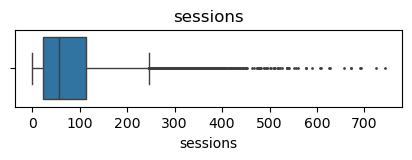

In [7]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['sessions'], fliersize=1)
plt.title('sessions');

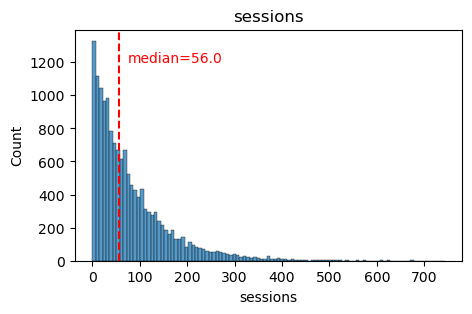

In [8]:
# Histogram
plt.figure(figsize=(5,3))
sns.histplot(x=df['sessions'])
median = df['sessions'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(75,1200, 'median=56.0', color='red')
plt.title('sessions');

The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

#### **`drives`**

An occurrence of driving at least 1 km during the month.

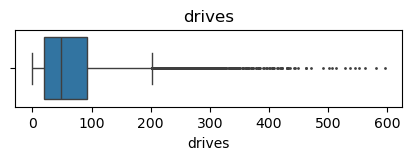

In [9]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['drives'], fliersize=1)
plt.title('drives');

In [10]:
# Helper function to plot histograms
def histogrammer(column_str, median_text=True, **kwargs): # **kwargs = any keyword arguments from the `sns.histplot()` function
    median=round(df[column_str].median(), 1)
    plt.figure(figsize=(5,3))
    # Plot the histogram
    ax = sns.histplot(x=df[column_str], **kwargs)
    # Plot the median line
    plt.axvline(median, color='red', linestyle='--')
    # Add median text unless set to False
    if median_text==True:                                    
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str}');

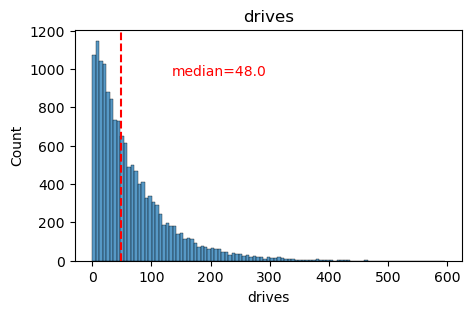

In [11]:
# Histogram
histogrammer('drives')

The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

#### **`total_sessions`**

A model estimate of the total number of sessions since a user has onboarded.

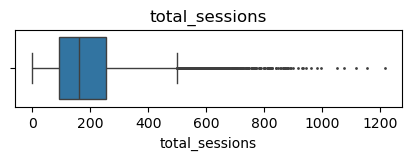

In [12]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['total_sessions'], fliersize=1)
plt.title('total_sessions');

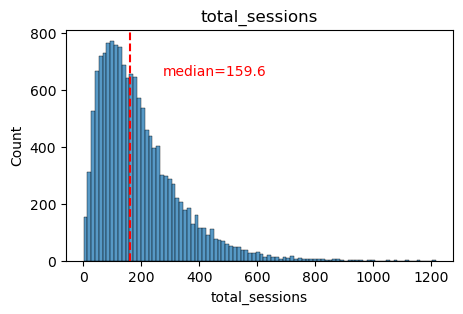

In [13]:
# Histogram
histogrammer('total_sessions')

The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 56 and the median total sessions was ≈160, then it seems that a large proportion of a user's (estimated) total drives might have taken place in the last month. This is something we can examine more closely later.

#### **`n_days_after_onboarding`**

The number of days since a user signed up for the app.

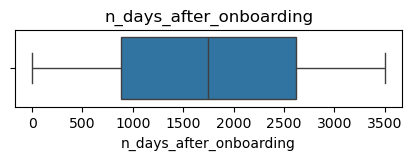

In [14]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['n_days_after_onboarding'], fliersize=1)
plt.title('n_days_after_onboarding');

Median: 1741.0


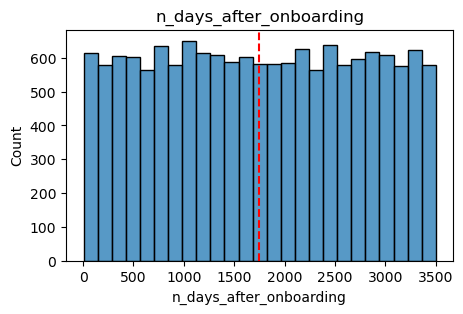

In [15]:
# Histogram
histogrammer('n_days_after_onboarding', median_text=False)

The total user tenure (i.e., number of days since onboarding) is a uniform distribution with values ranging from near-zero to 3,500 (≈9.5 years).

#### **`driven_km_drives`**

Total kilometers driven during the month.

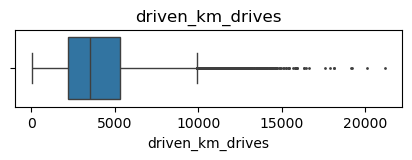

In [16]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driven_km_drives'], fliersize=1)
plt.title('driven_km_drives');

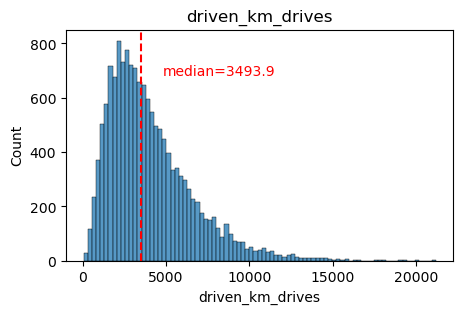

In [17]:
# Histogram
histogrammer('driven_km_drives')

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. Based on the inspection done in Part 1, the users in this dataset drive *a lot*. The longest distance driven in the month was over half the circumferene of the earth.

#### **`duration_minutes_drives`**

Total duration driven in minutes during the month.

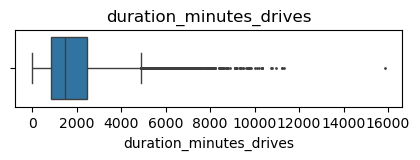

In [18]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['duration_minutes_drives'], fliersize=1)
plt.title('duration_minutes_drives');

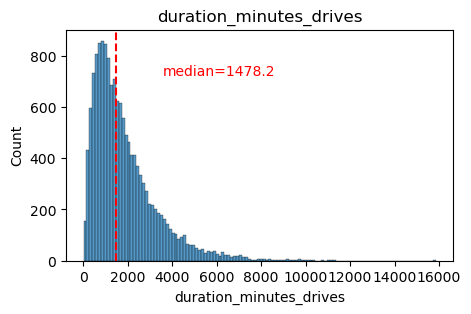

In [19]:
# Histogram
histogrammer('duration_minutes_drives')

The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than ≈1,478 minutes (≈25 hours), but some users clocked over 250 hours over the month.

#### **`activity_days`**

Number of days the user opens the app during the month.

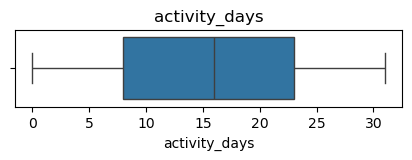

In [20]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['activity_days'], fliersize=1)
plt.title('activity_days');

Median: 16.0


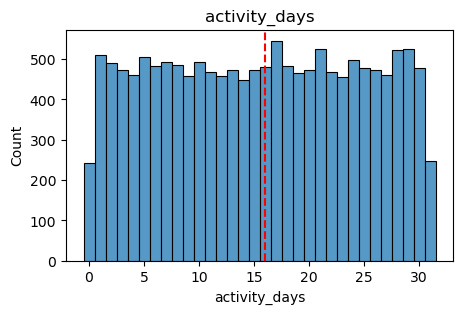

In [21]:
# Histogram
histogrammer('activity_days', median_text=False, discrete=True)

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ≈500 people opening the app on each count of days. However, there are ≈250 people who didn't open the app at all and ≈250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the `sessions` distribution, which one might think would be closely correlated with `activity_days`.

#### **`driving_days`**

Number of days the user drives (at least 1 km) during the month.

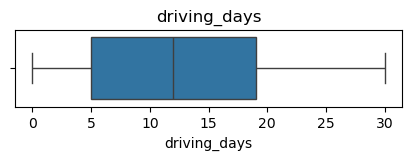

In [22]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driving_days'], fliersize=1)
plt.title('driving_days');

Median: 12.0


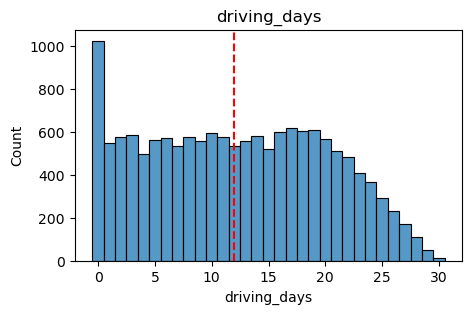

In [23]:
# Histogram
histogrammer('driving_days', median_text=False, discrete=True)

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

However, in the distribution of driving days, roughly twice as many users did not drive at all during the month (≈1,000) compared with ≈500 across most other day counts. This is intriguing when compared with the `activity_days` distribution, which shows ≈500 users across most day counts, but only ≈250 who never opened the app and ≈250 who opened it every day. This discrepancy should be flagged for further investigation.

#### **`driving_days` vs. `activity_days`**

Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, we can plot them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.

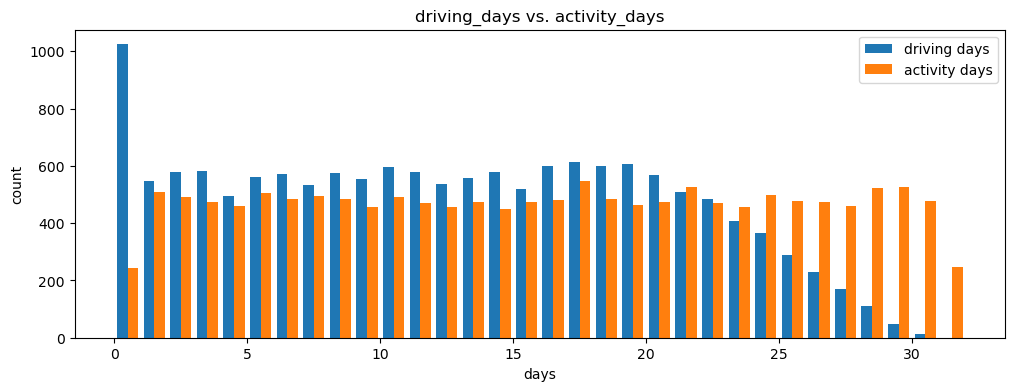

In [24]:
# Histogram
plt.figure(figsize=(12,4))
label=['driving days', 'activity days']
plt.hist([df['driving_days'], df['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days');

As observed previously, this is interesting. After all, why are there a lot fewer people who did not use the app at all during the month than those who did not drive at all during the same period?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive—perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

We should confirm the maximum number of days for each variable—`driving_days` and `activity_days`.

In [25]:
print(df['driving_days'].max())
print(df['activity_days'].max())

30
31


It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are ≈15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

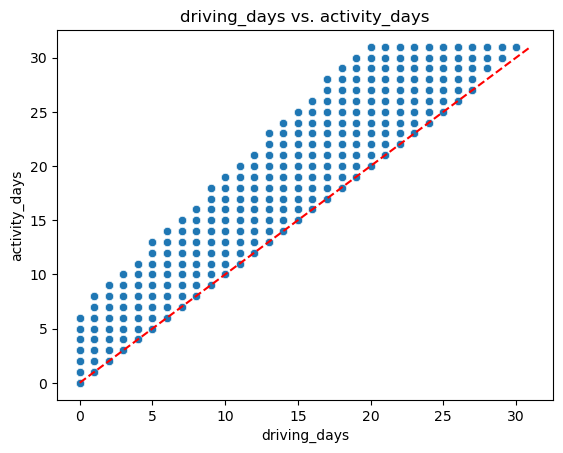

In [26]:
# Scatter plot
sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.title('driving_days vs. activity_days')
plt.plot([0,31], [0,31], color='red', linestyle='--');

Notice that there is a theoretical limit. If we use the app to drive, then by definition it must count as a day-use as well. In other words, we cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

#### **`device`**

The type of device a user starts a session with.

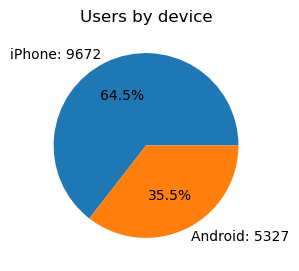

In [27]:
# Pie chart
fig = plt.figure(figsize=(3,3))
data=df['device'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Users by device');

There are nearly twice as many iPhone users as Android users represented in this data.

#### **`label`**

Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month.

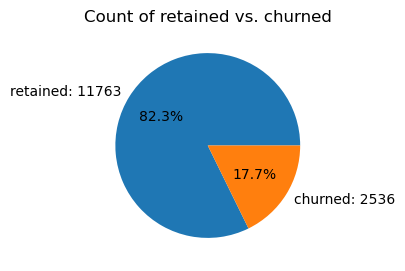

In [28]:
# Pie chart
fig = plt.figure(figsize=(3,3))
data=df['label'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Count of retained vs. churned');

Less than 18% of the users churned.

#### **Retention by `device`**

Let's plot a histogram that has four bars&mdash;one for each device-label combination—to show how many iPhone users were retained/churned and how many Android users were retained/churned.

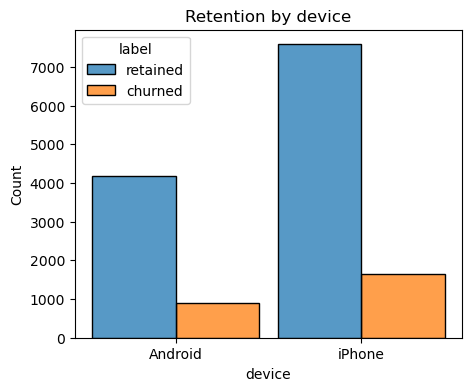

In [29]:
# Histogram
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Retention by device');

The proportion of churned users to retained users is consistent between device types.

#### **Churn rate by kilometers driven per driving day**

In Part 1, we discovered that the median distance driven per driving day last month for users who churned was 697.54 km, versus 289.55 km for people who did not churn. Let's analyze this further.

In [30]:
# Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# Call `describe()` on the new column
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

The mean value is infinity, the standard deviation is NaN, and the max. value is infinity.

This is the result of there being values of zero in the `driving_days` column.

In [31]:
# Convert infinite values to zero
df.loc[df['km_per_driving_day'] == np.inf, 'km_per_driving_day'] = 0

# Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers *per drive day*. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

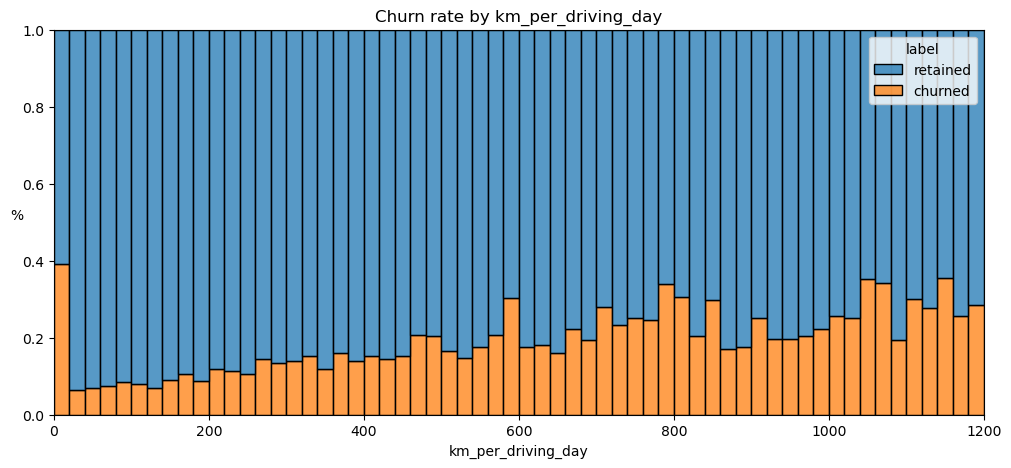

In [32]:
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='km_per_driving_day',
             # Disregard distances above 1,200 km
             bins=range(0,1201,20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by km_per_driving_day');

The churn rate tends to increase as the mean daily distance driven increases. It would be worth investigating further the reasons for long-distance drivers to discontinue using the app.

#### **Churn rate by number of drives per driving day**

In Part 1, we discovered that the median number of drives per driving day last month for users who churned was 10, versus ≈4 for people who did not churn. Let's analyze this further.

In [33]:
# Create `drives_per_driving_day` column
df['drives_per_driving_day'] = df['drives'] / df['driving_days']

# Call `describe()` on the new column
df['drives_per_driving_day'].describe()

count    1.499200e+04
mean              inf
std               NaN
min      0.000000e+00
25%      1.800000e+00
50%      4.666667e+00
75%      1.216667e+01
max               inf
Name: drives_per_driving_day, dtype: float64

In [34]:
# Convert infinite values to zero
df.loc[df['drives_per_driving_day']==np.inf, 'drives_per_driving_day'] = 0

# Confirm that it worked
df['drives_per_driving_day'].describe()

count    14992.000000
mean         9.387368
std         19.826097
min          0.000000
25%          1.250000
50%          3.666667
75%          9.000000
max        395.000000
Name: drives_per_driving_day, dtype: float64

The maximum value is 395 drives *per drive day*. This is an extremely large number and is highly unlikely to be true. For now, let's limit the number of drives to 60.

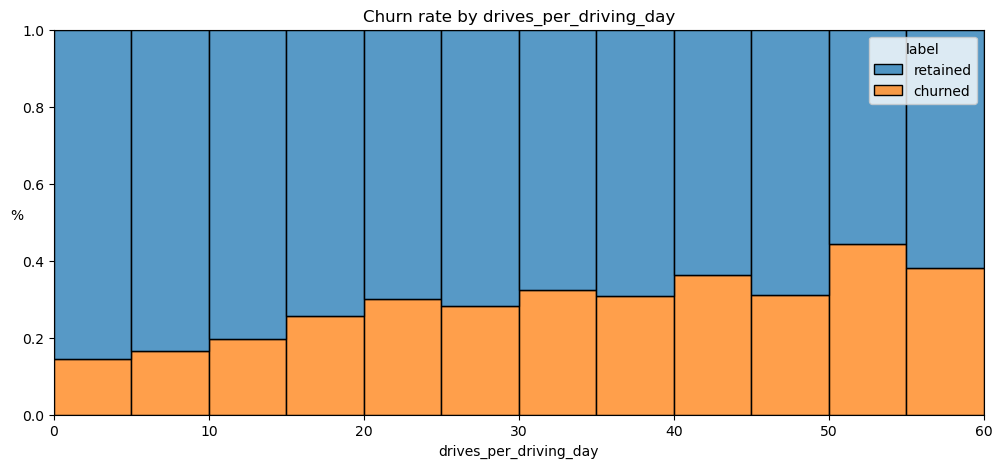

In [35]:
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='drives_per_driving_day',
             # Limit to 60 drives
             bins=range(0,61,5),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by drives_per_driving_day');

The churn rate generally increases as the mean number of drives per driving day increases. It would be worth investigating further the reasons for users who make more trips on days they drive to discontinue using the app.

#### **Churn rate by number of sessions per day since onboarding**

Let's create a new column that represents the mean number of sessions per day since onboarding and plot a histogram to visualize the corresponding churn rates.

In [36]:
# Create `sessions_per_day` column
df['sessions_per_day'] = df['total_sessions'] / df['n_days_after_onboarding']

# Call `describe()` on the new column
df['sessions_per_day'].describe()

count    14999.000000
mean         0.338698
std          1.314333
min          0.000298
25%          0.051037
50%          0.100775
75%          0.216269
max         39.763874
Name: sessions_per_day, dtype: float64

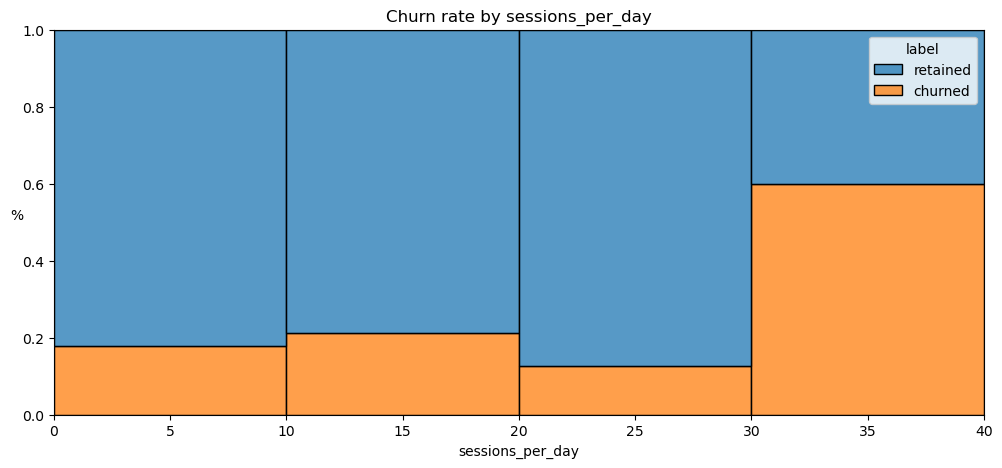

In [37]:
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='sessions_per_day',
             bins=range(0,41,10),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by sessions_per_day');

The churn rate generally increases with the mean number of sessions per day since onboarding, which appears counterintuitive. It would be worthwhile to investigate why more active users are churning.

#### **Churn rate by number of driving days**

Let's create another histogram to represent the churn rates across different number of driving days during the month.

In [38]:
df['driving_days'].describe()

count    14999.000000
mean        12.179879
std          7.824036
min          0.000000
25%          5.000000
50%         12.000000
75%         19.000000
max         30.000000
Name: driving_days, dtype: float64

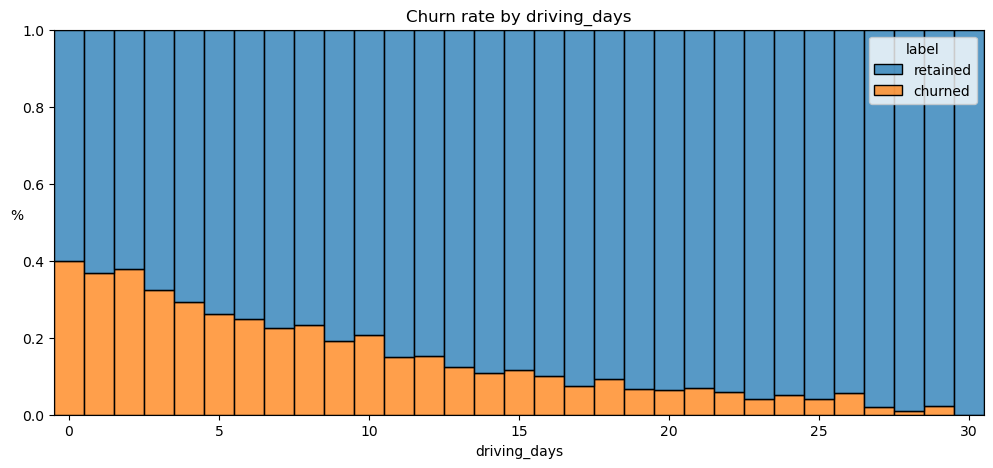

In [39]:
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='driving_days',
             bins=range(1,31),
             hue='label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation=0)
plt.title('Churn rate by driving_days');

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

#### **Churn rate by number of days since onboarding**

Let's create another histogram to visualize the churn rates by the number of days since onboarding.

In [40]:
df['n_days_after_onboarding'].describe()

count    14999.000000
mean      1749.837789
std       1008.513876
min          4.000000
25%        878.000000
50%       1741.000000
75%       2623.500000
max       3500.000000
Name: n_days_after_onboarding, dtype: float64

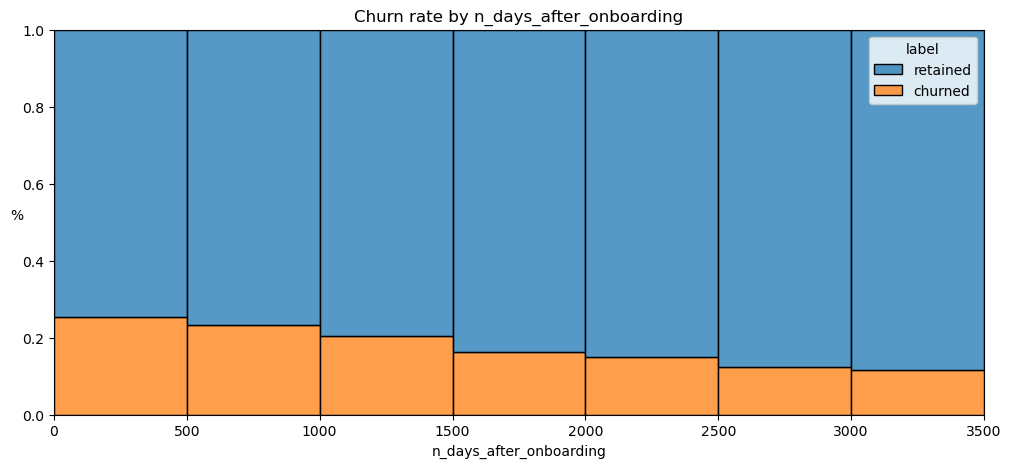

In [41]:
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='n_days_after_onboarding',
             bins=range(0,3501,500),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by n_days_after_onboarding');

The churn rate tends to decrease as the number of days since signup increases. This makes sense, as long-term users are more likely to have formed habits and see value in the app.

#### **Proportion of sessions that occurred in the last month**

Let's create a new column `prop_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

In [42]:
df['prop_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

In [43]:
df['prop_sessions_in_last_month'].describe()

count    14999.000000
mean         0.449255
std          0.286919
min          0.000000
25%          0.196221
50%          0.423097
75%          0.687216
max          1.530637
Name: prop_sessions_in_last_month, dtype: float64

The maximum value for `prop_sessions_in_last_month` exceeds 1, which is invalid. This is likely caused by data errors. We should limit the values for it to 1. 

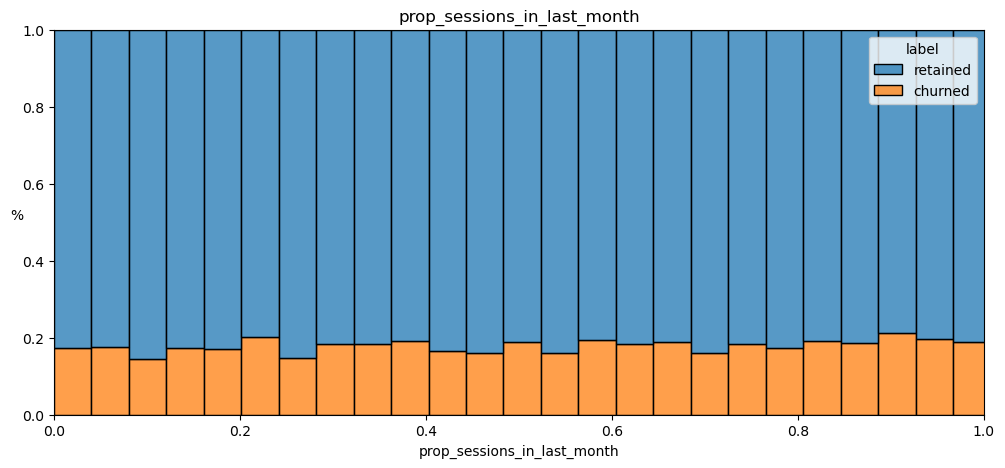

In [44]:
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='prop_sessions_in_last_month',
             hue='label',
             multiple='fill')
# Limit to 1
plt.xlim(0,1)
plt.ylabel('%', rotation=0)
plt.title('prop_sessions_in_last_month');

In [45]:
df['n_days_after_onboarding'].median()

1741.0

In [46]:
df['prop_sessions_in_last_month'].median()

0.42309702992763176

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

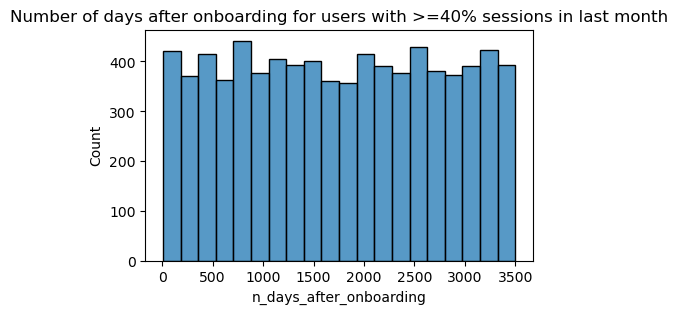

In [47]:
# Histogram
data = df.loc[df['prop_sessions_in_last_month']>=0.4]
plt.figure(figsize=(5,3))
sns.histplot(x=data['n_days_after_onboarding'])
plt.title('Number of days after onboarding for users with >=40% sessions in last month');

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

### 2c. Handling outliers

The box plots from the previous section indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

It may be useful to impute outlying data with more reasonable values (i.e., **reassign**). One way of performing this imputation is to set a threshold based on a percentile of the distribution, a process known as **winsorizing**.

In [48]:
def outlier_imputer(column_name, percentile):
    # Calculate threshold
    threshold = df[column_name].quantile(percentile)
    # Impute threshold for values > than threshold
    df.loc[df[column_name] > threshold, column_name] = threshold
    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

Next, we apply that function to the following columns:
* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

In [49]:
for column in ['sessions', 'drives', 'total_sessions', 'driven_km_drives', 'duration_minutes_drives']:
    outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.3632037399997
         driven_km_drives | percentile: 0.95 | threshold: 8889.7942356
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.899348999998


Call `describe()` to see if our change worked.

In [50]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,drives_per_driving_day,sessions_per_day,prop_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14992.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,578.963113,9.387368,0.338698,0.449255
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,1030.094384,19.826097,1.314333,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000,0.000298,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,1.250000,0.051037,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,3.666667,0.100775,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,9.000000,0.216269,0.687216
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,395.000000,39.763874,1.530637


Let's see what the boxplot of `drives` looks like now.

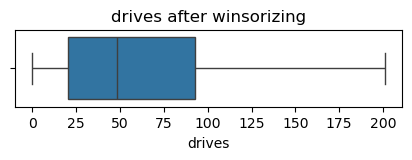

In [51]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['drives'], fliersize=1)
plt.title('drives after winsorizing');

No more outliers!

### Conclusion

1. What types of distributions did we notice in the variables? What did this tell us about the data?

> *Nearly all the variables were either very right-skewed or uniformly distributed. For the right-skewed distributions, this means that most users had values in the lower end of the range for that variable. For the uniform distributions, this means that users were generally equally likely to have values anywhere within the range for that variable.*

2. Was there anything that led us to believe the data was erroneous or problematic in any way?

> *Most of the data was not problematic, and there was no indication that any single variable was completely wrong. However, several variables had highly improbable or perhaps even impossible outlying values, such as `driven_km_drives`. Some of the monthly variables also might be problematic, such as `activity_days` and `driving_days`, because one has a max. value of 31 while the other has a max. value of 30, indicating that data collection might not have occurred in the same month for both of these variables.*

3. Did our investigation give rise to further questions that we would like to explore or ask the Waze team about?

> *Yes. I'd want to ask the Waze data team to confirm that the monthly variables were collected during the same month, given the fact that some have max. values of 30 days while others have 31 days. I'd also want to learn why so many long-time users suddenly started using the app so much in just the last month. Was there anything that changed in the last month that might prompt this kind of behavior?*

4. What percentage of users churned and what percentage were retained?

> *Less than 18% of users churned, and ≈82% were retained.*

5. What factors correlated with user churn? How?

> *Distance driven per driving day showed a positive correlation with churn: the farther users drove on each driving day, the more likely they were to churn. Similarly, the number of drives per driving day and the number of sessions per day were also positively correlated with churn. In contrast, the number of driving days and the number of days since signup were negatively correlated with churn, indicating that users who drove more frequently or had been signed up longer were less likely to churn.*

6. Did newer uses have greater representation in this dataset than users with longer tenure? How do we know?

> *No. Users of all tenures from brand new to ≈10 years were relatively evenly represented in the data. This is borne out by the histogram for `n_days_after_onboarding`, which reveals a uniform distribution for this variable.*

# END OF PART 2